# Bruk av Euler-Cromer-metoden og bli kjent med SciPy-biblioteket

### TFY4163 Fluidmekanikk og bølgefysikk – Programmeringsøving 2

**Forkunnskaper:** Introduksjon til SciPy-notebooken og Euler-metoden. 

**Læringsmål:** Løse andreordens ODE ved Euler-Cromer-metoden. Bli kjent med SciPy-biblioteket, og benytte en funksjon fra integrate pakken for å løse ODE. 

------------------------

I programmeringsøving 1 ble Euler-metoden brukt til å finne en løsning av bevegelsesligningen for en enkel harmonisk pendel. Vi observerte da at vinkelutslaget, og derfor energien, økte raskt med tiden. Vi må derfor forbedre vår numeriske metode for å få en fysisk løsning.

Til dette skal vi benytte Euler-Cromer metoden (ofte også kalt semi-implisitt Euler-metode). Metoden er basert på en enkel modifikasjon av Euler metoden. Vi bruker de *gamle* verdiene, $\theta_i$ for å beregne vinkelhastigheten $\omega_{i+1}$, men den *oppdaterte* verdien, $\omega_{i+1}$, for å beregne vinkelen, $\theta_{i+1}$.

Bevegelsesligningen (som ble utledet i programmeringsøving 1) er


$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta,$$ 

hvor $\theta$ er vinkelutslaget til snora med hensyn til vertikalen, $g$ er tyngdeakselerasjonen og $l$ er lengden av snora.

## Oppgave 1 – Løsning av bevegelsesligningen ved Euler-Cromer metoden 

Parametrene og initialbetingelsene til pendelen

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\omega_0 = 0.0$ rad/s

**a)** Lag en funksjon hvor du beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, ved å bruke Euler-Cromer metoden. Anta også her at $\sin \theta \approx \theta$ (lite vinkelutslag).

In [1]:
# Husk å definere nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt
# Definer konstanter og initialbetingelser
g = 9.8
l = 1.0
m = 5.0
theta0 = 0.2
w0 = 0
dt = 0.001
T = 10
T_E = 2*np.pi*np.sqrt(l/g)
# For å plotte i notebooken
%matplotlib inline

def euler_cromer_approx(theta0, w0, dt, T):
    
    """
    Calculates angular displacement and angular velocity using the Euler-Cromer method
    
    PARAMETERS:
    -----------
    theta_0: initial angular displacement 
    w_0: initial angular velocity
    dt: timestep
    T: max t
    
    
    RETURNS:
    --------
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    
    # SKRIV KODE HER 
#     N = int(T/dt)
#     time_list,dt = np.linspace(0,T,N, retstep = True)
#     theta_list = np.zeros(N)
#     w_list = theta_list
#     theta_list[0] = theta0
#     w_list[0] = w0
#     for i in range(len(time_list)-1):
#         w_list[i+1] = -g/l * dt *theta_list[i] #np.sin(theta_list[i])
#         theta_list[i+1] = theta_list[i] + w_list[i+1]*dt
    t_values = np.linspace(0,T,int(T/dt))
    theta_values = np.zeros(len(t_values))
    theta_values[0] = theta0
    omega_values = np.zeros(len(t_values))
    omega_values[0] = w0
    
    for i in range(1,len(t_values)):
        omega_values[i] = omega_values[i-1] - g*l*theta_values[i-1]*dt
        theta_values[i] = theta_values[i-1] + omega_values[i]*dt
    return theta_values, omega_values, t_values
#     return theta_list, w_list, time_list

**b)** Vi skal nå undersøke hvor stabil Euler-Cromer metoden er for vårt system.

1. Plot vinkelutslaget, $\theta$, som funksjon av tid, $t$, opp til $t = 10$ s. Bruk tidssteg $\Delta t = 0.007$ s. Observer at amplituden til vinkelutslaget *ikke* endrer seg med tid slik den gjorde med Euler-metoden i programmeringsøvingøving 1 (oppgave 2c). Euler-Cromer metoden er derfor en forbedring over Euler metoden da vi har konstant total energi.

2. Benytt funksjonen `energy_calculation` fra programmeringsøving 1 (oppgave 2b), og bytt ut  `euler_method` med `euler_cromer_approx`. Plot den totale energien til pendelen som funksjon av tid, for tidssteg $\Delta t = 0.001$ s, $\Delta t = 0.004$ s og $\Delta t = 0.007$ s. Husk å inkludere `label` for plottene, og `legend` for figuren. Du vil nå observere at den totale energien varierer periodisk, men er konservert for en *periode*,
$2 \pi \sqrt{l/g}$. Videre vil du observere at hvor mye energien varierer over en periode minker med tidssteget. 

5. Beregn energidifferansen mellom slutten og starten av en periode for $\Delta t = 0.001$ s. *Hint:* Plot for tid opp til $t = 2 \pi \sqrt{l/g}$, slik at det siste elementet i arrayen er ved fullført periode. Du kan aksessere siste element i en array, `a`, med `a[-1]`.

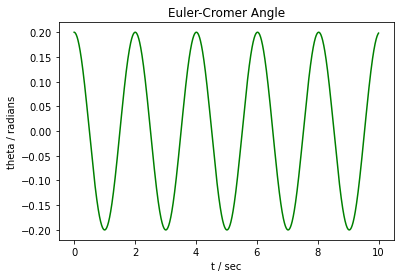

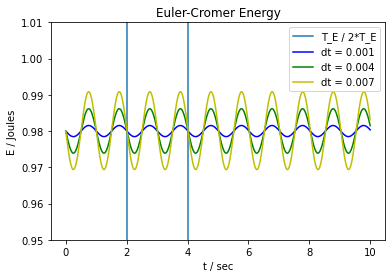

Differansen mellom energien i starten vs slutten av en periode er: 1.8239431032185394e-07


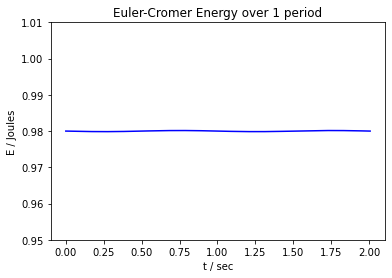

In [2]:
def energy_calculation(theta_0, w_0, dt,T):

    E_total = np.linspace(0,T,int(T/dt))
    theta_list, omega_list, time_list = euler_cromer_approx(theta_0,w_0,dt,T)
    
    for i in range(len(E_total)):
        K = m*omega_list[i]**2*l**2/2
        U = g*m*l*theta_list[i]**2/2
        E_total[i] = K + U
        
    return E_total, time_list

"""Oppgave 1b1"""
theta, w, time = euler_cromer_approx(theta0,w0,0.007,10)

plt.figure(1)
plt.title("Euler-Cromer Angle")
plt.xlabel("t / sec")
plt.ylabel("theta / radians")
plt.plot(time,theta,'g')

"""Oppgave 1b2"""
E_list1,t_list1 = energy_calculation(theta0,w0,0.001,T)
E_list2,t_list2 = energy_calculation(theta0,w0,0.004,T)
E_list3,t_list3 = energy_calculation(theta0,w0,0.007,T)


plt.figure(2)
plt.title("Euler-Cromer Energy")
plt.xlabel("t / sec")
plt.ylabel("E / Joules")
plt.ylim(0.95,1.01)
plt.axvline(x=T_E,label = "T_E / 2*T_E")
plt.axvline(x=T_E*2) #Dette virker å gi den dobbelte perioden.
plt.plot(t_list1,E_list1,'b',label = "dt = 0.001")
plt.plot(t_list2,E_list2,'g',label = "dt = 0.004")
plt.plot(t_list3,E_list3,'y',label = "dt = 0.007")
plt.legend()
plt.show()

"""Oppgave 1b3"""
E_list_period ,t_list_period = energy_calculation(theta0,w0,0.0001,T_E) #en null mer gir 10e-7 og spør om eksamen


plt.figure(3)
plt.title("Euler-Cromer Energy over 1 period")
plt.xlabel("t / sec")
plt.ylabel("E / Joules")
plt.ylim(0.95,1.01)
plt.plot(t_list_period,E_list_period,'b')
print(f"Differansen mellom energien i starten vs slutten av en periode er: {E_list_period[-1]-E_list_period[0]}")

**c)** Vi går nå bort fra tilnærmelsen $\sin \theta = \theta$, slik at bevegelsesligningen for pendelen er gitt ved

\begin{equation}
 	\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta.
	\label{bevegelse}
\end{equation}

Denne differensialligningen, som er ikke-lineær, kan ikke løses analytisk, og vi *må* derfor benytte numeriske metoder. Det er viktig å merke seg at svært mangle ligninger man kommer fram til i fysikken ikke har analytiske løsninger, og det er derfor nyttig å kunne numeriske metoder for å tilnærme løsningene. 

1. Skriv en funksjon som beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, som funksjon av tid ved bruk av Euler-Cromer metoden. *Hint:* Kun en liten endring av koden er nødvendig.


2. Plot vinkelutslaget funnet med liten vinkel tilnærmelsen sammen med vinkelutslaget som beregner fra funksjonen over, for initialvinkel $\theta_0 = 15^\circ$ og $\theta_0 = 40^\circ$. Benytt tidssteg $\Delta t = 0.001$ s. Prøv deg gjerne fram med forskjellige vinkler, og observer for hvilke startvinkler det ser ut som at liten vinkel tilnærmelsen er rimelig å benytte. *Tips:* Bruk funksjonen `np.radians` for å konvertere fra grader til radianer.
 
 

Ser at det er veldig lite avvik mellom de to med mindre amplitude(startsvinkel), men ved 45 grader er det tydelig.


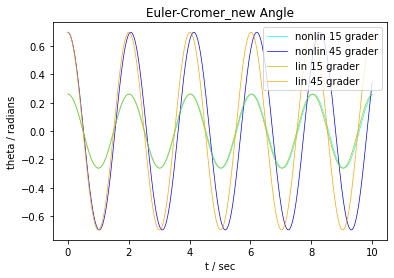

In [3]:
# SKRIV KODE HER
def euler_cromer_approx_nonlin(theta0, w0, dt, T):
    
    
    t_values = np.linspace(0,T,int(T/dt))
    theta_values = np.zeros(len(t_values))
    theta_values[0] = theta0
    omega_values = np.zeros(len(t_values))
    omega_values[0] = w0
    
    for i in range(1,len(t_values)):
        omega_values[i] = omega_values[i-1] - g*l*np.sin(theta_values[i-1])*dt
        theta_values[i] = theta_values[i-1] + omega_values[i]*dt
    return theta_values, omega_values, t_values
#     return theta_list, w_list, time_list

theta_nonlin1, w, t = euler_cromer_approx_nonlin(np.radians(15), w0, 0.001, T)
theta_nonlin2, w, t = euler_cromer_approx_nonlin(np.radians(40), w0, 0.001, T)
theta_lin1, w, t = euler_cromer_approx(np.radians(15), w0, 0.001, T)
theta_lin2, w, t = euler_cromer_approx(np.radians(40), w0, 0.001, T)

print("Ser at det er veldig lite avvik mellom de to med mindre amplitude(startsvinkel), men ved 45 grader er det tydelig.")

plt.figure(4)
plt.title("Euler-Cromer_new Angle")
plt.xlabel("t / sec")
plt.ylabel("theta / radians")
plt.plot(t,theta_nonlin1, color ="aqua",linewidth = 0.7,label="nonlin 15 grader")
plt.plot(t,theta_nonlin2, color ="blue",linewidth = 0.7,label="nonlin 45 grader")
plt.plot(t,theta_lin1, color ="y",linewidth = 0.7,label="lin 15 grader")
plt.plot(t,theta_lin2, color ="orange",linewidth = 0.7,label="lin 45 grader")
plt.legend()
plt.show()

##  Oppgave 2 – Bruk av SciPy biblioteket

Vi skal nå bruke funksjonen `scipy.integrate.solve_ivp` fra SciPy-biblioteket for å finne løsning til bevegelsesligningen for pendelen (som er en andreordens ordinær differensialligning). Når man skal bruke en ny funksjon for første gang så må man lese gjennom funksjons-dokumentasjonen, sånn at man skjønner hvordan funksjonen brukes. Les derfor gjennom notebooken "Introduksjon til SciPy" som ligger på BlackBoard under "Numeriske øvinger". **Det er viktig at du har lest nøye gjennom denne, og forstår eksempelet gitt der.**

`scipy.integrate.solve_ivp` bruker Runge-Kutta 5(4)-metoden (ofte forkortet RK45) som standard, noe vi også skal bruke i denne oppgaven. Denne metoden er en såkalt *adaptiv metode* med varierende tidssteg. Kort fortalt bruker metoden to ulike ODE-løsere (4. og 5. ordens Runge-Kutta [se programmeringsøving 3]) til å beregne usikkerheten til hvert steg. Steglengden justeres slik at ønsket usikkerhet blir oppnådd. Dermed bruker man korte steglengder kun når det er nødvendig. Dere lærer mer om dette i faget TMA4320 Introduksjon til vitenskapelige beregninger. De som er interesserte kan ta en titt på notebooken [Adaptive Runge-Kutta Method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/adaptive_runge_kutta_methods.ipynb) for å lære mer om prinsippet.

I eksemplene fra dokumentasjonen er det vist hvordan man finner løsning for en førsteordens ordinær differensialligning (ODE). Bevegelsesligningen for den enkle harmoniske pendelbevegelsen er en *andreordens ODE*. Vi må derfor løse ett ligningssystem av *to* ODE-er. 

**a)** Lag en funksjon som tar inn en float `t`, og et array `vals`, og returnerer et array av de to verdiene til høyresiden av de to ODE-ene for den harmonsike pendelen (uten å anta lite vinkelutslag). Det er gitt funksjonsdeklarasjon, input parametre og hva som skal returneres i funksjonen under. *Hint:* Skriv først bevegelsesligningen for pendelen som to førsteordens ODE-er (slik som ble gjort i programmeringsøving 1). 


In [4]:
from scipy.integrate import solve_ivp
def equation(t, vals):
    """
    Calculates the value of RHS of the differentail equations given an array (vals) which 
    contains the values of the parameters

    Parameters
    -----------
    t: float. time
    vals: array. values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    
    # SKRIV KODE HER
    # x1 = theta
    # x1' = x2
    # x2' = -g/lm*sin(x1)
    theta =vals[0]
    w =vals[1]        
    
    dtheta = w
    dw = -g/(l*m)*np.sin(theta)
    return [dtheta, dw]

"""
Note:
scipy.integrate.solve_ivp requires that fun returns
an object which is of type array_like. 
An ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)
so we can return a list, and do not have to first convert into an np.array. 
"""

'\nNote:\nscipy.integrate.solve_ivp requires that fun returns\nan object which is of type array_like. \nAn ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)\nso we can return a list, and do not have to first convert into an np.array. \n'

**b)** Lag en funksjon som benytter `scipy.integrate.solve_ivp` for å beregne vinkelutslaget, $\theta$ og vinkelhastigheten, $\omega$. Funksjonen skal også returnere en array med tidsverdier. Plot vinkelutslaget som funksjon av tid, opp til $t = 10$ s. Sett $\theta_0 = 0.2$ rad, og $\omega_0 = 0.0$ rad/s. Bruk tidssteg $\Delta t = 0.01$.

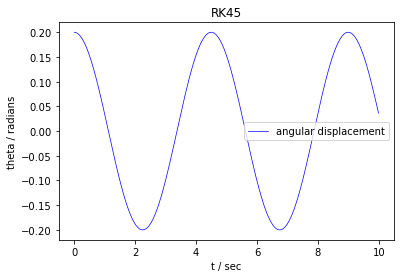

In [5]:
def RK45_method(RHS, theta_0, w_0, t_1, dt):
    """
    Calculates theta and omega using the scipy.integrate.solve_ivp function (RK54)
    
    RHS: right hand side of differential equations
    t_1: time-value to calculate up to (e.g. 10 seconds)
    dt: timestep
    
    Returns
    -------
    theta: array of theta values
    w: array of omega values
    t: timevalues
    """
    
    # SKRIV KODE HER
    t_array = np.arange(0,t_1,dt)
    
    IC = np.array([theta_0,w_0])
    t_span = (0,t_1)
    y = solve_ivp(RHS,t_span,IC,method = 'RK45',t_eval = t_array) #y som returneres er en array et objekt som må
    theta = y.y[0][:]# brukes metoder på for å få ut størrelser vi vil ha. .y gir arrey med løsninger for x1 og x2
    w = y.y[1][:]
    t = y.t#.t returnerer tidspunkter som korresponderer med løsningene fra .y
    return theta, w, t

# PLOT VINKELUTSLAGET
plt.figure(5)
plt.title("RK45")
plt.xlabel("t / sec")
plt.ylabel("theta / radians")
# plt.plot(t,theta_nonlin1, color ="aqua",linewidth = 0.7,label="nonlin 15 grader") #sammenligning med min naive løsning

dt = 0.01
theta_0 = 0.2
w_0 = 0.0
t_1 = 10
theta, w, t = RK45_method(equation, theta_0, w_0, t_1, dt)

plt.plot(t,theta, color ="blue",linewidth = 0.7,label="angular displacement")
# plt.plot(t,w, color ="b",linewidth = 0.7,label="angular velocity")
plt.legend()
plt.show()